# Introducción

Este proyecto se enfoca en el análisis y modelado predictivo de datos relacionados con la producción de energía en la localización de Sotavento. A través de un análisis exploratorio de datos (EDA), se identifican características clave, se detectan posibles problemas como valores faltantes y se determina la naturaleza del problema (regresión o clasificación). Posteriormente, se comparan y evalúan varios modelos de aprendizaje automático, incluyendo KNN, árboles de regresión, regresión lineal y SVM, ajustando sus hiperparámetros para mejorar el rendimiento predictivo. Finalmente, se selecciona el mejor modelo, se evalúa su rendimiento futuro y se realiza un análisis específico sobre la calidad de las predicciones en función de la producción de energía. Este enfoque integral permitirá obtener insights significativos para optimizar la producción de energía en Sotavento.

# Imports generales

In [ ]:
!pip install scikit-optimize
import time
from scipy.stats import randint, uniform

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, TimeSeriesSplit

import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt  # visualisation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.6 MB/s eta 0:00:00


# Leer archivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/wind_ava.csv'
df = pd.read_csv(file_path)
df.head(5)

Mounted at /content/drive


,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986


# EDA

## Análisis de atributos e instancias



In [ ]:
num_instances, num_features = df.shape
print("Number of instances: ", num_instances)
print("Number of features: ", num_features)

Number of instances:  4748
Number of features:  552


## Análisis de cada atributo
Como se puede apreciar, todas las columnas (excepto datetime y energy) son de tipo numérico y ninguna tiene valores faltantes.

In [ ]:
variable_types = df.dtypes
columns = df.columns
missing_values = df.isnull().sum()
print("Tipos de variables:")
for i in range(len(variable_types)):
    if variable_types[i] in ['float64', 'int64']:
        print(columns[i], ": ", variable_types[i], "-> numérico. || Missing values: ", missing_values[i])
    else:
        print(columns[i], ": ", variable_types[i], "-> categórico. || Missing values: ", missing_values[i])

Tipos de variables:
datetime :  object -> categórico. || Missing values:  0
energy :  float64 -> numérico. || Missing values:  0
p54.162.1 :  float64 -> numérico. || Missing values:  0
p54.162.2 :  float64 -> numérico. || Missing values:  0
p54.162.3 :  float64 -> numérico. || Missing values:  0
p54.162.4 :  float64 -> numérico. || Missing values:  0
p54.162.5 :  float64 -> numérico. || Missing values:  0
p54.162.6 :  float64 -> numérico. || Missing values:  0
p54.162.7 :  float64 -> numérico. || Missing values:  0
p54.162.8 :  float64 -> numérico. || Missing values:  0
p54.162.9 :  float64 -> numérico. || Missing values:  0
p54.162.10 :  float64 -> numérico. || Missing values:  0
p54.162.11 :  float64 -> numérico. || Missing values:  0
p54.162.12 :  float64 -> numérico. || Missing values:  0
p54.162.13 :  float64 -> numérico. || Missing values:  0
p54.162.14 :  float64 -> numérico. || Missing values:  0
p54.162.15 :  float64 -> numérico. || Missing values:  0
p54.162.16 :  float64 -> 

## Atributos duplicados, vacíos y constantes

In [ ]:
# Mostrar columnas con valores faltantes
print("Columnas con valores faltantes:")
if missing_values.sum() == 0:
    print("No hay columnas con valores faltantes")
else:
    for col in columns:
        if missing_values[col] > 0:
            print(col, ": ", missing_values[col])

# Columnas constantes
constant_columns = df.columns[df.nunique() == 1]
print("Columnas constantes:")
if len(constant_columns) == 0:
    print("No hay columnas constantes")
else:
    for col in constant_columns:
        print(col)

# Filas duplicadas
duplicated_rows = df.duplicated()
print("Filas duplicadas: ", duplicated_rows.sum())

# Filas vacías
empty_rows = df.isnull().all(axis=1)
print("Filas vacías: ", empty_rows.sum())

Columnas con valores faltantes:
No hay columnas con valores faltantes
Columnas constantes:
No hay columnas constantes
Filas duplicadas:  0
Filas vacías:  0


## Naturaleza del problema

Por estar prediciendo una variable de tipo numérico, nos encontramos ante un problema de regresión.

In [ ]:
problem_type = "Problema de Regresión" if df['energy'].dtype in ['float64', 'int64'] else "Problema de Clasificación"
print(f"Naturaleza del problema: {problem_type}")

Naturaleza del problema: Problema de Regresión


## Selección de columnas relevantes

Se eliminan las columnas que no pertenecen al parque Sotavento

In [ ]:
# Eliminación de variables meteorológicas no correspondientes a la localización 13
print("Columnas relevantes:")
relevant_columns = [col for col in df.columns if col.endswith(".13") or col in ['datetime', 'energy']]
df_relevant = df[relevant_columns]
print("Número de columnas relevantes: ", len(df_relevant.columns))

Columnas relevantes:
Número de columnas relevantes:  24


## Análisis de la variable objetivo

In [ ]:
maximo = df_relevant['energy'].max()
minimo = df_relevant['energy'].min()
promedio = df_relevant['energy'].mean()

print("Máximo de la columna 'energía':", maximo)
print("Mínimo de la columna 'energía':", minimo)
print("Promedio de la columna 'energía':", promedio)

Máximo de la columna 'energía': 2792.55
Mínimo de la columna 'energía': 0.01
Promedio de la columna 'energía': 693.126246840775


In [ ]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4748 non-null   object 
 1   energy      4748 non-null   float64
 2   p54.162.13  4748 non-null   float64
 3   p55.162.13  4748 non-null   float64
 4   cape.13     4748 non-null   float64
 5   p59.162.13  4748 non-null   float64
 6   lai_lv.13   4748 non-null   float64
 7   lai_hv.13   4748 non-null   float64
 8   u10n.13     4748 non-null   float64
 9   v10n.13     4748 non-null   float64
 10  sp.13       4748 non-null   float64
 11  stl1.13     4748 non-null   float64
 12  u10.13      4748 non-null   float64
 13  v10.13      4748 non-null   float64
 14  t2m.13      4748 non-null   float64
 15  stl2.13     4748 non-null   float64
 16  stl3.13     4748 non-null   float64
 17  iews.13     4748 non-null   float64
 18  inss.13     4748 non-null   float64
 19  stl4.13     4748 non-null  

## Conversión de tiempo en formato fecha

Adaptamos la columna datetime para poder construir gráficos que muestren información relevante sobre los datos.

In [ ]:
df_relevant['datetime'] = pd.to_datetime(df_relevant['datetime'])

df_relevant['year'] = df_relevant['datetime'].dt.year
df_relevant['month'] = df_relevant['datetime'].dt.month
df_relevant['day'] = df_relevant['datetime'].dt.day
df_relevant['hour'] = df_relevant['datetime'].dt.hour

<ipython-input-10-b94aea1edf21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['datetime'] = pd.to_datetime(df_relevant['datetime'])
<ipython-input-10-b94aea1edf21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['year'] = df_relevant['datetime'].dt.year
<ipython-input-10-b94aea1edf21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

## Días sin mediciones

In [ ]:
# Find the range of dates
min_date = df_relevant['datetime'].min()
max_date = df_relevant['datetime'].max()

# Extract unique dates from the datetime column
unique_dates_with_measurements = df_relevant['datetime'].dt.date.unique()

# Generate a range of dates within the specified range
date_range = pd.date_range(min_date, max_date, freq='D')

# Identify the missing dates
missing_dates = set(date_range.date) - set(unique_dates_with_measurements)

# Convert missing dates to DataFrame
missing_dates_df = pd.DataFrame({'missing_dates': list(missing_dates)})

# Sort the DataFrame by 'missing_dates' column
missing_dates_df['missing_dates'] = pd.to_datetime(missing_dates_df['missing_dates'])
missing_dates_df = missing_dates_df.sort_values(by='missing_dates')

# Display the missing dates
print("Days with no measurements:")
print(missing_dates_df.to_string(index=False))
print("Total: ", len(missing_dates_df))

Days with no measurements:
missing_dates
   2005-06-12
   2005-06-19
   2005-12-22
   2006-01-21
   2006-01-22
   2006-11-11
   2006-12-24
   2007-02-05
   2007-03-12
   2007-03-13
   2007-03-14
   2007-03-15
   2007-03-16
   2007-03-17
   2007-03-18
   2007-03-19
   2007-03-20
   2007-03-21
   2007-03-22
   2007-03-23
   2007-03-24
   2007-03-25
   2007-03-26
   2007-03-27
   2007-03-28
   2007-03-29
   2007-03-30
   2007-03-31
   2007-04-01
   2007-04-02
   2007-04-03
   2007-09-26
   2007-09-27
   2007-10-08
   2007-12-15
   2007-12-30
   2008-02-10
   2008-02-11
   2008-02-26
   2008-02-27
   2008-02-28
   2008-02-29
   2008-03-01
   2008-03-02
   2008-03-03
   2008-03-04
   2008-03-05
   2008-03-06
   2008-03-07
   2008-03-08
   2008-03-09
   2008-03-10
   2008-03-11
   2008-03-12
   2008-03-13
   2008-03-14
   2008-03-15
   2008-03-16
   2008-03-17
   2008-03-18
   2008-03-19
   2008-03-20
   2008-03-21
   2008-03-22
   2008-03-23
   2008-03-24
   2008-03-25
   2008-03-26
   2008

## Meses sin mediciones

De esta forma, se observa claramente que existe un intervalo entre 2008 y 2009 donde no se tomaron mediciones

In [ ]:
# Find the range of months
min_month = df_relevant['datetime'].min().to_period('M')
max_month = df_relevant['datetime'].max().to_period('M')

# Extract unique months from the datetime column
unique_months_with_measurements = df_relevant['datetime'].dt.to_period('M').unique()

# Generate a range of months within the specified range
month_range = pd.period_range(min_month, max_month, freq='M')

# Identify the missing months
missing_months = set(month_range) - set(unique_months_with_measurements)

# Convert missing months to DataFrame
missing_months_df = pd.DataFrame({'missing_months': list(missing_months)})

# Sort the DataFrame by 'missing_months' column
missing_months_df = missing_months_df.sort_values(by='missing_months')

# Display the missing months
print("Months with no measurements:")
print(missing_months_df.to_string(index=False))
print("Total: ", len(missing_months_df))

Months with no measurements:
missing_months
       2008-03
       2008-04
       2008-05
       2008-06
       2008-07
       2008-08
       2008-09
       2008-10
       2008-11
       2008-12
       2009-01
       2009-02
Total:  12


## Gráficos

### Días sin mediciones - Raw data



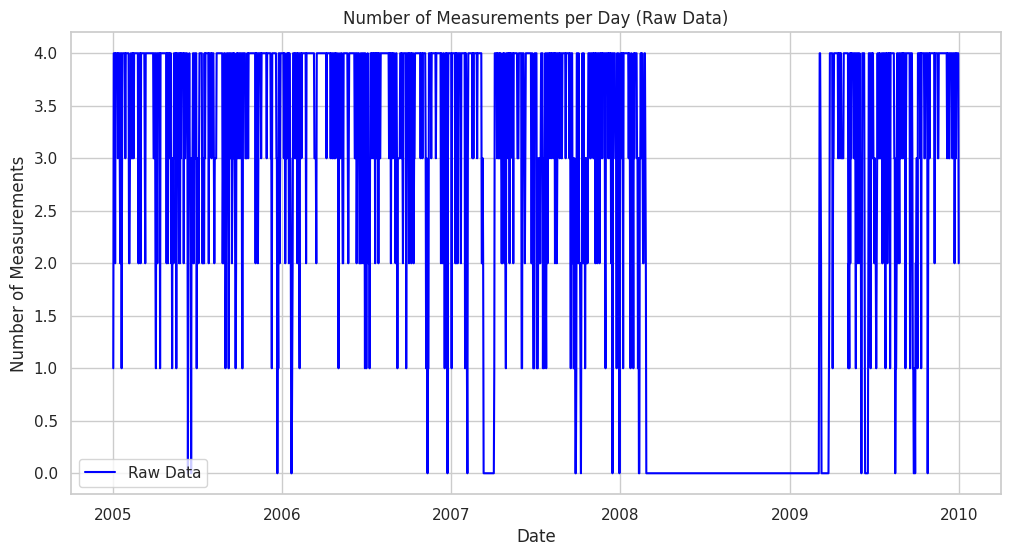

In [ ]:
sns.set(color_codes=True)
sns.set(style="whitegrid")
measurements_per_day = df_relevant.groupby(df_relevant['datetime'].dt.date).size().reset_index(name='measurement_count')
# Create a continuous date range spanning the entire period
full_date_range = pd.date_range(start=measurements_per_day['datetime'].min(), end=measurements_per_day['datetime'].max(), freq='D')

# Convert the "datetime" column in the original DataFrame to datetime data type
measurements_per_day['datetime'] = pd.to_datetime(measurements_per_day['datetime'])

# Merge with the actual data and fill missing values with 0
measurements_per_day = pd.DataFrame({'datetime': full_date_range}).merge(measurements_per_day, on='datetime', how='left').fillna(0)

# Plot the raw data
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='measurement_count', data=measurements_per_day, color='blue', label='Raw Data')

# Adding labels and title
plt.title('Number of Measurements per Day (Raw Data)')
plt.xlabel('Date')
plt.ylabel('Number of Measurements')

plt.legend()
plt.show()

### Días sin mediciones - Smoothed data


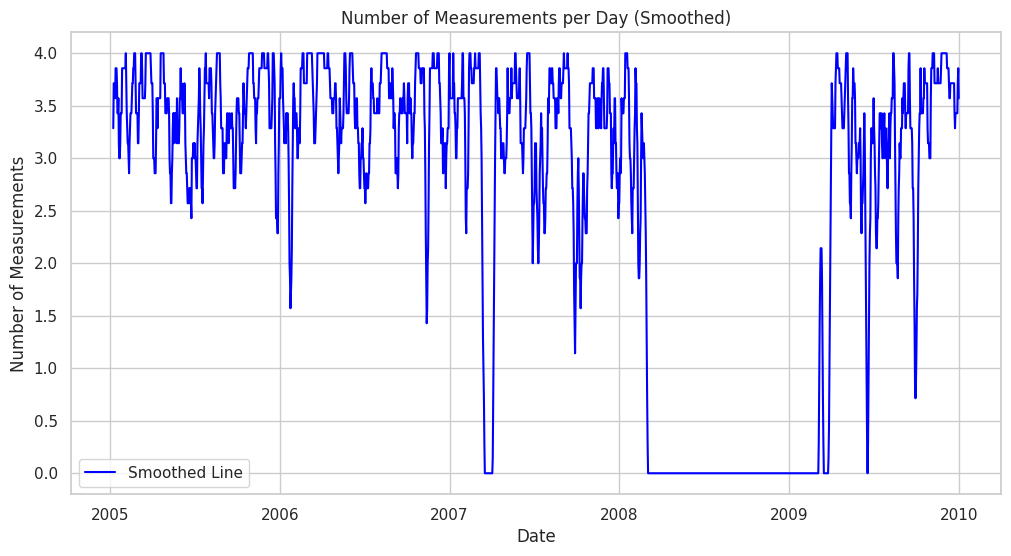

In [ ]:
# Smooth the data with a rolling average
window_size = 7  # You can adjust the window size based on your preference
measurements_per_day['measurement_count_smoothed'] = measurements_per_day['measurement_count'].rolling(window=window_size).mean()

# Plot the smoothed line using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='measurement_count_smoothed', data=measurements_per_day, color='blue', label='Smoothed Line')

# Adding labels and title
plt.title('Number of Measurements per Day (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Number of Measurements')

plt.legend()
plt.show()

### Evolución de la energía en el tiempo

<ipython-input-47-3f41906912ed>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


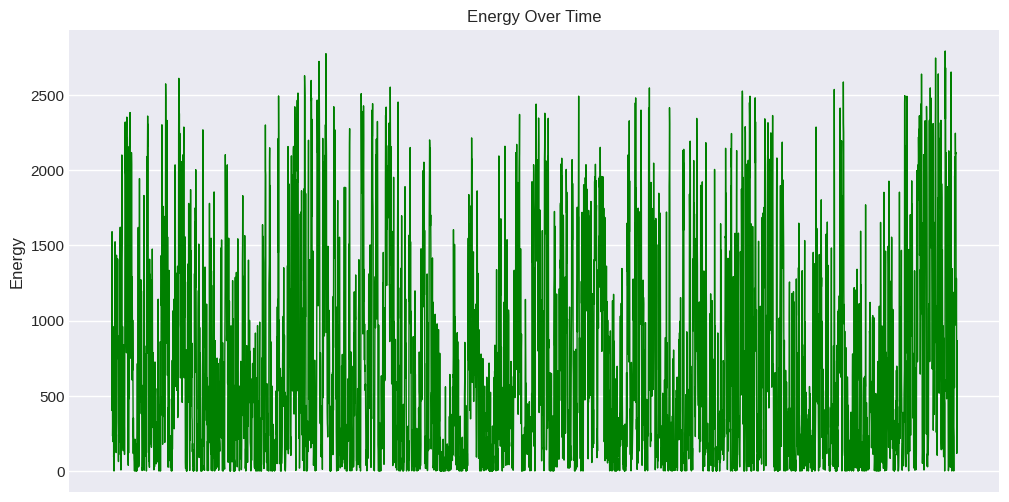

In [ ]:
# Plotting the energy over time with each day on the x-axis and yearly ticks
plt.figure(figsize=(12, 6))
plt.plot(df_relevant.index, df_relevant['energy'], color='green', linestyle='-', linewidth=1)
plt.title('Energy Over Time')
plt.xlabel('')
plt.ylabel('Energy')
plt.grid(True)

# Remove the x-axis ticks
plt.xticks([])

# Adjust plot style
plt.style.use('seaborn-darkgrid')

plt.show()


### Evolución de la energía durante un año (2017)
Se calcula la media de energía para cada día para mostrar un gráfico más suave y comprensible

In [ ]:
import matplotlib.dates as mdates
# Filter the data for the year 2007
df_2007 = df_relevant[df_relevant['year'] == 2007]

# Set 'datetime' column as index
df_2007.set_index('datetime', inplace=True)

# Resample the data to get the daily average energy measurement for each day of the year
df_2007_daily_avg = df_2007.resample('D').mean()

# Plotting the daily average energy over time
plt.figure(figsize=(12, 6))
plt.plot(df_2007_daily_avg.index, df_2007_daily_avg['energy'], color='green', linestyle='-', linewidth=1)
plt.title('Daily Average Energy Measurements in 2007')
plt.xlabel('Date')
plt.ylabel('Average Energy')
plt.grid(True)

# Set the x-axis ticks to display only the months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot style
plt.style.use('seaborn-darkgrid')

plt.show()


KeyError: 'year'

## Preparar datos para entrenamiento



Debemos separar los datos entre 'Train' y 'Test'. Para ello hemos decidido almacenar en 'Train' todos los datos anteriores al "parón" de 2008 y en 'Test' los posteriores.

In [ ]:
# Filter the DataFrame where 'year' is equal to 2018
filtered_df_2008 = df_relevant[df_relevant['year'] == 2008]

# Find the highest index of the filtered DataFrame
highest_index_2008 = filtered_df_2008.index.max()

print("Highest index of an element with 'year' equal to 2008:", highest_index_2008)

# Filter the DataFrame where 'year' is equal to 2009
filtered_df = df_relevant[df_relevant['year'] == 2009]

# Find the first index of the filtered DataFrame
first_index_2009 = filtered_df.index.min()

print("First index of an element with 'year' equal to 200:", first_index_2009)

Highest index of an element with 'year' equal to 2008: 3826
First index of an element with 'year' equal to 200: 3827


In [ ]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
df_relevant = df_relevant.drop(columns=['datetime', 'year', 'month', 'day', 'hour'])

# Splitting indices
train_index_end = 3826
test_index_start = 3827

# Splitting data
X,y = df_relevant.drop(columns=['energy']),df_relevant['energy']
X_train, X_test = X.iloc[:train_index_end + 1], X.iloc[test_index_start:]
y_train, y_test = y.iloc[:train_index_end + 1], y.iloc[test_index_start:]

# Sanity check
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3827, 22)
y_train shape: (3827,)
X_test shape: (921, 22)
y_test shape: (921,)


# Evaluación *outer*, *inner* y métrica
Debido a que nos encontramos frente a una serie temporal, hemos decidido usar TimeSeriesSplit para llevar a cabo la inner evaluation.
Para el outer, haremos una división de los datos en train y test cuidando de que esos datos no sean los que están vacíos entre 2008 y 2009. Es decir, se escoge ***train*** hasta el día que se produce esa "brecha temporal" de datos vista anteriormente. Y ***test*** desde entonces hasta el final.
La evaluación outer se utiliza para estimar el rendimiento futuro del modelo en datos no vistos, mientras que la inner se enfoca en el ajuste de hiperparámetros y la comparación de modelos.
Es importante no utilizar TimeSeriesSplit en la evaluación outer ya que esto provocaría que el conjunto de train y test cada vez fuese más pequeño hasta llegar a un punto en el que lo que se trabaje con esos datos no sea representativo. (TimeSeriesSplit va haciendo folds de train y test cada vez más pequeños).

La métrica que se va a usar es el rmse ya que nos parece la métrica más fácil de interpretar al estar en las mismas unidades que la variable objetivo.
Por otra parte, para el problema de clasificación, usaremos F1 score.

# Selección de escalador


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize dictionaries to store scores
scores = {}

# MinMaxScaler
pipeline_min_max = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor())
])
pipeline_min_max.fit(X_train, y_train)
y_pred_min_max = pipeline_min_max.predict(X_test)
rmse_min_max = np.sqrt(mean_squared_error(y_test, y_pred_min_max))
scores["MinMaxScaler"] = rmse_min_max

# StandardScaler
pipeline_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])
pipeline_standard.fit(X_train, y_train)
y_pred_standard = pipeline_standard.predict(X_test)
rmse_standard = np.sqrt(mean_squared_error(y_test, y_pred_standard))
scores["StandardScaler"] = rmse_standard

# RobustScaler
pipeline_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', KNeighborsRegressor())
])
pipeline_robust.fit(X_train, y_train)
y_pred_robust = pipeline_robust.predict(X_test)
rmse_robust = np.sqrt(mean_squared_error(y_test, y_pred_robust))
scores["RobustScaler"] = rmse_robust

# Print results
print("RMSE for MinMaxScaler:", scores["MinMaxScaler"])
print("RMSE for StandardScaler:", scores["StandardScaler"])
print("RMSE for RobustScaler:", scores["RobustScaler"])

RMSE for MinMaxScaler: 474.0920267183527
RMSE for StandardScaler: 434.509641696542
RMSE for RobustScaler: 436.20372965497177


La media más baja para el RMSE es la del StandardScaler por lo que usaremos ese escalador cuando consideremos los modelos que a continuación se explican.


# Modelos

## Hiperparámetros por omisión


A continuación, probaremos varios modelos con sus hiperparámetros por defecto.




### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

pipeline_KNN = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipeline_KNN.fit(X_train, y_train)

y_pred_KNN = pipeline_KNN.predict(X_test)

rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_KNN))

print("Root Mean Squared Error for KNN with StandardScaler (without HPO):", rmse_KNN)

Root Mean Squared Error for KNN with StandardScaler (without HPO): 434.509641696542


### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

pipeline_Dec_tree = Pipeline([
    ('decision_tree', DecisionTreeRegressor())
])

# Entrena el modelo en los datos de entrenamiento
pipeline_Dec_tree.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_Dec_tree = pipeline_Dec_tree.predict(X_test)

# Calcula el RMSE
rmse_Dec_tree = np.sqrt(mean_squared_error(y_test, y_pred_Dec_tree))

print("Root Mean Squared Error para Decision Tree (sin HPO):", rmse_Dec_tree)

Root Mean Squared Error para Decision Tree (sin HPO): 512.4640918057934


### Regresión lineal (normal)

In [ ]:
from sklearn.linear_model import LinearRegression

pipeline_lRegr = Pipeline([
    ('linear_regression', LinearRegression())
])

pipeline_lRegr.fit(X_train, y_train)

y_pred_lRegr = pipeline_lRegr.predict(X_test)

rmse_lRegr = np.sqrt(mean_squared_error(y_test, y_pred_lRegr))

print("Root Mean Squared Error para Linear Regression (sin HPO):", rmse_lRegr)

Root Mean Squared Error para Linear Regression (sin HPO): 551.5411322398418


### Regresión lineal (variante Lasso)

In [ ]:
from sklearn.linear_model import Lasso

pipeline_lasso = Pipeline([
    ('lasso', Lasso())
])

pipeline_lasso.fit(X_train, y_train)

y_pred_lasso = pipeline_lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Root Mean Squared Error para Lasso Regression (sin HPO):", rmse_lasso)

Root Mean Squared Error para Lasso Regression (sin HPO): 568.1352256102186


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.985e+08, tolerance: 1.693e+05
  model = cd_fast.enet_coordinate_descent(


### Regresión lineal (variante Ridge)

In [ ]:
from sklearn.linear_model import Ridge

pipeline_ridge = Pipeline([
    ('ridge', Ridge())
])

pipeline_ridge.fit(X_train, y_train)

y_pred_ridge = pipeline_ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Root Mean Squared Error para Ridge Regression (sin HPO):", rmse_ridge)

Root Mean Squared Error para Ridge Regression (sin HPO): 565.2461403406769


### Regresión lineal (Elastic Net)

In [ ]:
from sklearn.linear_model import ElasticNet

pipeline_elastic_net = Pipeline([
    ('elasticnet', ElasticNet())
])

pipeline_elastic_net.fit(X_train, y_train)

y_pred_elastic_net = pipeline_elastic_net.predict(X_test)

rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))

print("Root Mean Squared Error para Elastic Net Regression (sin HPO):", rmse_elastic_net)

Root Mean Squared Error para Elastic Net Regression (sin HPO): 595.7330950278327


### SVM

In [ ]:
from sklearn.svm import SVR

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

pipeline_svm.fit(X_train, y_train)

y_pred_svm = pipeline_svm.predict(X_test)

rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))

print("Root Mean Squared Error para SVM Regression (sin HPO):", rmse_svm)

Root Mean Squared Error para SVM Regression (sin HPO): 637.5113391363395


### Conclusión HPO

Tras ver el error de todos los métodos antes presentados, observamos que el que menor error tiene es el KNN con 434,50.

## Ajuste de hiperparámetros

A continuación, probaremos los mismos modelos pero realizando optimización de hiperparámetros (HPO) en el inner loop.

### KNN con ajuste de hiperparámetros

Inicialmente, knn_neighbours tenía como cota superior 11, pero al ser ésta el mejor hiperparámetro, se tuvo que aumentar el espacio de búsqueda

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_space = {
    'knn__n_neighbors': randint(1, 60, 2),  # Solo impares
    'knn__weights': ['uniform', 'distance'],
    'knn__p': randint(1, 2),
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': randint(10, 50),
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}

knn_random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_space,
    scoring='neg_root_mean_squared_error',
    cv=TimeSeriesSplit(n_splits=3),
    n_iter=50,
    verbose=1,
    n_jobs=1,
    random_state=6
)

inicio = time.time()
knn_random_search.fit(X_train, y_train)
fin = time.time()

y_pred_knn = knn_random_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

print("Best parameters:", knn_random_search.best_params_)

elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Root Mean Squared Error: 416.5783332314632
Best parameters: {'knn__algorithm': 'auto', 'knn__leaf_size': 25, 'knn__metric': 'manhattan', 'knn__n_neighbors': 21, 'knn__p': 1, 'knn__weights': 'distance'}
Elapsed time: 36.71008348464966 seconds


### Decision tree con ajuste de hiperparámetros
Aumentamos el espacio de búsqueda *'min_samples_split'* porque al analizar los hiperparámetros ganadores del cross_validate, el valor siempre era 14.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Parameters grid for DecisionTreeRegressor
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14],
    'min_samples_split': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
}

# Initialize GridSearchCV
decision_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=1),
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=TimeSeriesSplit(n_splits=3),
    n_jobs=1,
    verbose=1
)

# Fit the model with training data
inicio = time.time()
decision_tree.fit(X_train, y_train)
fin = time.time()

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate root mean squared error
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("Root Mean Squared Error:", rmse)

# Print best parameters for the fitted model
print("Best parameters:", decision_tree.best_params_)

# Calculate elapsed time
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 70 candidates, totalling 210 fits
Root Mean Squared Error: 444.336646852198
Best parameters: {'max_depth': 6, 'min_samples_split': 24}
Elapsed time: 8.355917930603027 seconds


### Regresión lineal (normal)

Aunque realmente no existe ajuste de hiperparámetros en Regresión lineal sin variante, podemos ajustar ciertas opciones del modelo.

In [ ]:
from sklearn.linear_model import LinearRegression

# Parameters grid for Linear Regression
param_grid_lr = {
    'linear_regression__fit_intercept': [True, False],
    'linear_regression__positive': [True, False],
    'linear_regression__copy_X': [True, False],
    'linear_regression__n_jobs': [None, 1, 2, 4]  # Depending on the sklearn linear regression implementation
}

# Create a pipeline for Linear Regression
pipeline_lr = Pipeline([
    ('linear_regression', LinearRegression())  # Linear Regression model
])

# Initialize GridSearchCV for Linear Regression
lr_grid_search = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    scoring='neg_root_mean_squared_error',
    cv=TimeSeriesSplit(n_splits=3),
    n_jobs=1,
    verbose=1
)

# Fit the model with training data
inicio = time.time()
lr_grid_search.fit(X_train, y_train)
fin = time.time()

# Predict on the test set
y_pred = lr_grid_search.predict(X_test)

# Calculate root mean squared error
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("Root Mean Squared Error:", rmse)

# Print best parameters for the fitted model
print("Best parameters:", lr_grid_search.best_params_)

# Calculate elapsed time
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Root Mean Squared Error: 543.6704112167009
Best parameters: {'linear_regression__copy_X': True, 'linear_regression__fit_intercept': False, 'linear_regression__n_jobs': None, 'linear_regression__positive': False}
Elapsed time: 2.7223455905914307 seconds


### Regresión lineal (variante Lasso)

In [ ]:
from sklearn.linear_model import Lasso

param_grid_lasso = {
    'lasso__alpha': [0.0001,0.001,0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'lasso__fit_intercept': [True, False],
    'lasso__precompute': [True, False],
    'lasso__copy_X': [True, False],
    'lasso__max_iter': [500, 750, 1000, 2000, 3000],
    'lasso__tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
    'lasso__warm_start': [True, False],
    'lasso__positive': [True, False],
    'lasso__random_state': [None],
    'lasso__selection': ['cyclic', 'random']
}

pipeline_lasso = Pipeline([
    ('lasso', Lasso()),
])

lasso_random_search = RandomizedSearchCV(pipeline_lasso,
                                 param_distributions=param_grid_lasso,
                                 scoring='neg_root_mean_squared_error',
                                 cv=TimeSeriesSplit(n_splits=3),
                                 n_jobs=1,
                                 verbose=1,
                                 n_iter=50,
                                 random_state=6)

inicio = time.time()
lasso_random_search.fit(X_train, y_train)
fin = time.time()

y_pred_lasso = lasso_random_search.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Root Mean Squared Error para Lasso Regression:", rmse_lasso)
print("Best parameters:", lasso_random_search.best_params_)

elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144008546.11895293, tolerance: 360953.6016855743
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310446715.1363306, tolerance: 875430.9782495789
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452551420.57294524, tolerance: 1272089.6253726874
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergence

Root Mean Squared Error para Lasso Regression: 545.124901241654
Best parameters: {'lasso__warm_start': False, 'lasso__tol': 1e-05, 'lasso__selection': 'random', 'lasso__random_state': None, 'lasso__precompute': False, 'lasso__positive': False, 'lasso__max_iter': 750, 'lasso__fit_intercept': True, 'lasso__copy_X': False, 'lasso__alpha': 0.1}
Elapsed time: 13.838355302810669 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.760e+08, tolerance: 1.693e+04
  model = cd_fast.enet_coordinate_descent(


Aunque haya convergence warnings, debido a max_iterations, obtenemos un resultado aunque no sea el mínimo.

### Regresión lineal (variante Ridge)



In [ ]:
from sklearn.linear_model import Ridge

param_grid_ridge = {
    'ridge__alpha': np.linspace(0.1, 40, num=20),
    'ridge__fit_intercept': [True, False],
}

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge_grid_search = GridSearchCV(pipeline_ridge,
                                 param_grid_ridge,
                                 scoring='neg_root_mean_squared_error',
                                 cv=TimeSeriesSplit(n_splits=3),
                                 n_jobs=1,
                                 verbose=1)

inicio = time.time()
ridge_grid_search.fit(X_train, y_train)
fin = time.time()

y_pred_ridge = ridge_grid_search.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Root Mean Squared Error para Ridge Regression:", rmse_ridge)
print("Best parameters:", ridge_grid_search.best_params_)

elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Root Mean Squared Error para Ridge Regression: 553.4916152555404
Best parameters: {'ridge__alpha': 4.3, 'ridge__fit_intercept': True}
Elapsed time: 3.6260766983032227 seconds


### Regresión lineal (Elastic Net)

In [ ]:
from sklearn.linear_model import ElasticNet

param_grid_elastic_net = {
    'elasticnet__alpha': [0.06, 0.09, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9],  # Parámetro de mezcla, 0 para penalización L2, 1 para penalización L1
    'elasticnet__fit_intercept': [True, False],
}

pipeline_elastic_net = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

elastic_net_grid_search = GridSearchCV(pipeline_elastic_net,
                                      param_grid_elastic_net,
                                      scoring='neg_root_mean_squared_error',
                                      cv=TimeSeriesSplit(n_splits=3),
                                      n_jobs=1,
                                      verbose=1)

inicio = time.time()
elastic_net_grid_search.fit(X_train, y_train)
fin = time.time()

y_pred_elastic_net = elastic_net_grid_search.predict(X_test)

mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)

print("Root Mean Squared Error para Elastic Net Regression:", rmse_elastic_net)
print("Best parameters:", elastic_net_grid_search.best_params_)

elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Root Mean Squared Error para Elastic Net Regression: 556.4943195226413
Best parameters: {'elasticnet__alpha': 0.06, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.9}
Elapsed time: 11.162356853485107 seconds


### SVM <a name="cell-id"></a>

In [ ]:
from sklearn.svm import SVR

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

param_grid_svm = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': [500, 600, 700, 800, 900, 1000],
    'svm__gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(pipeline_svm,
                              param_grid_svm,
                              scoring='neg_root_mean_squared_error',
                              cv=TimeSeriesSplit(n_splits=3),
                              n_jobs=-1,
                              verbose=1)

inicio = time.time()
svm_grid_search.fit(X_train, y_train)
fin = time.time()

y_pred_svm = svm_grid_search.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print("Root Mean Squared Error para SVM Regression:", rmse_svm)
print("Best parameters:", svm_grid_search.best_params_)

elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Root Mean Squared Error para SVM Regression: 386.8509023045595
Best parameters: {'svm__C': 800, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Elapsed time: 123.35930681228638 seconds


## Conclusiones generales


### Mejor método y método más rápido

Tras observar cómo se comportan todos los modelos, se puede identificar que aquel con menor RMSE es SVM (SVR por ser un problema de regresión) a pesar de que su tiempo de entrenamiento es mucho mayor que KNN, aproximadamente 3 veces más. Esto se debe a que el entrenamiento de KNN es almacenar las instancias mientras que SVR debe realizar complejas traansformaciones en el espacio, muy costosas computacionalmente.




En conclusión, el mejor método para omisión de hiperparámetros es KNN, pero para ajuste de hiperparámetros es SVM.
En cuanto al tiempo, en omisión de hiperparámetros, la ejecución es prácticamente instantánea, sin embargo al ajustar hiperparámetros, al usar grid o random search para probar varias posibles combinaciones de hiperparámetros, la complejidad temporal creció bastante, hasta unos 12 segundos para KNN o hasta 135 segundos para SVM. Esto tiene sentido ya que al ajustar hiperparámetros se deben probar muchas combinaciones.
Por otro lado, otros métodos han sido más rápidos como la regresión normal con Ridge la cual tarda alrededor de 1,7 segundos con ajuste de hiperparámetros.
Por lo tanto, podemos decir que el método más rápido es la regresión lineal con Ridge. Por otra parte, el más lento ha sido el SVM ya que tarda mucho más que los demás métodos utilizados.
Esta alta complejidad temporal que presenta la SVM se debe a que la complejidad computacional al usar kernels no lineales como el rbf (el cual es elegido como mejor parámetro), es muy alta y por ello este incremento en el tiempo.

### Regresor dummy

Para probar el regresor dummy, usaremos la división entre train y test y calcularemos el rmse que nos sale al usar ese dummy regressor

In [ ]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")

# Ajustar el modelo a los datos de entrenamiento
dummy_regr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_dummy = dummy_regr.predict(X_test)

# Calcular el error cuadrático medio
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mse_dummy)

print("Root Mean Squared Error para Dummy Regression (estrategia = 'mean'):", rmse_dummy)

Root Mean Squared Error para Dummy Regression (estrategia = 'mean'): 666.7611633784188


Como se puede observar, a diferencia del mejor modelo de regresión, el cual dio un RMSE = 386.85, la regresión dummy da 666.76, un valor mucho más elevado, por lo que podemos garantizar que nuestro modelo es mejor que el Dummy.

### Mejora de Omisión de hiperparámetros a ajuste de hiperparámetros

Por otra parte, en cuanto a la mejora de HPO a ajuste de hiperparámetros, todos los métodos mejoran su error al realizar ajuste de hiperparámetros aunque unos más que otros como se verá en el siguiente punto.

### Equilibrio entre tiempo de ejecución y mejora de resultados.

Para KNN, aumentando de un tiempo prácticamente instantáneo a 12,49 segundos, se reduce el error de 434,5 a 414,24 resultando en una bajada del error de aproximadamente un 4,66%.

Para Decision tree, aumentando el tiempo hasta 7,78 segundos, se pasa de un error de 516,17 en omisión de hiperparámetros a 444,33 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 13,91%.

Para la regresión normal sin regularización, el tiempo aumenta hasta 2,4 segundos, se pasa de un error de 551,54 en omisión de hiperparámetros a 543,67 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 1,42%.

Para la regresión lineal con Lasso, el tiempo aumenta hasta 8,5 segundos, se pasa de un error de 568,13 en omisión de hiperparámetros a 552,05 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 2,84%.

Para la regresión lineal con Ridge, el tiempo aumenta hasta 2,9 segundos, se pasa de un error de 565,24 en omisión de hiperparámetros a 553,49 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 2,07%.

Para la regresión lineal con Elastic net, el tiempo aumenta hasta 4,9 segundos, se pasa de un error de 595,73 en omisión de hiperparámetros a 556,85 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 6,52%.

Para SVM, el tiempo aumenta hasta 120 segundos, se pasa de un error de 637,51 en omisión de hiperparámetros a 386,85 con ajuste de hiperparámetros. Esto significa una mejora de 39,4%.

Como se puede observar, el aumento de tiempo en SVM merece la pena ya que el aumento en rendimiento es relevante. Sin embargo, debemos escoger los hiperparámetros cuidadosamente para conseguir buenos resultados. Si escogiéramos los hiperparámetros al azar, SVM podría devolver malos resultados y además, lentos.

###Atributos más relevantes

Con lo realizado anteriormente, no sería posible seleccionar aquellos atributos más relevantes.

En [svm_grid_search](#cell-id) tenemos el mejor modelo, con los mejores hiperparámetros, entrenado con X_train e y_train.


# Elección del mejor modelo

El mejor modelo como se ha dicho en apartados anteriores es SVM con ajuste de hiperparámetros.

## Comparar errores para valores altos y bajos

### Error absoluto

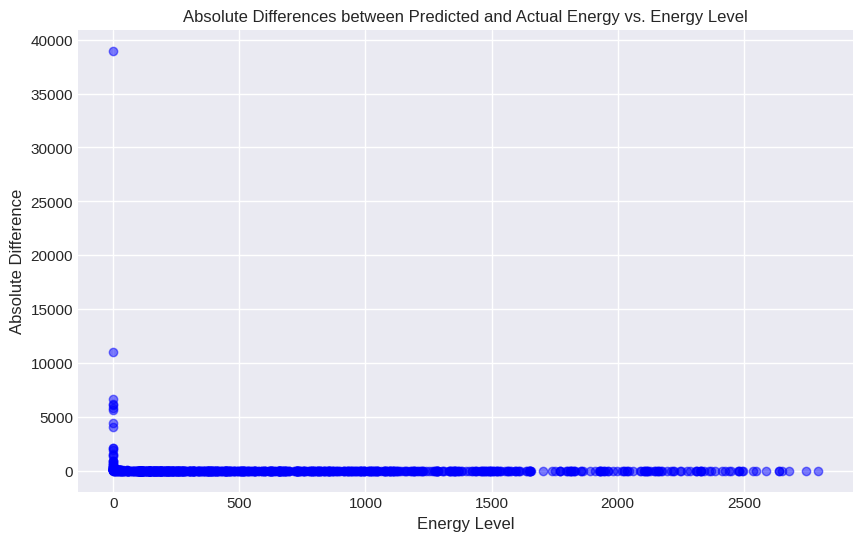

In [ ]:
absolute_differences = abs(y_pred_svm - y_test)/y_test

data = pd.DataFrame({'Energy': y_test, 'Absolute Difference': absolute_differences})

data_sorted = data.sort_values(by='Energy')

plt.figure(figsize=(10, 6))

plt.scatter(data_sorted['Energy'], data_sorted['Absolute Difference'], color='blue', alpha=0.5)

plt.title('Absolute Differences between Predicted and Actual Energy vs. Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Absolute Difference')

plt.grid(True)
plt.show()


### Error relativo

       Energy  Percentage Difference
3827   977.91              50.344003
3828  1191.99              25.675852
3829   795.88              12.585498
3830   141.05             598.198636
3831  1124.20              52.714283


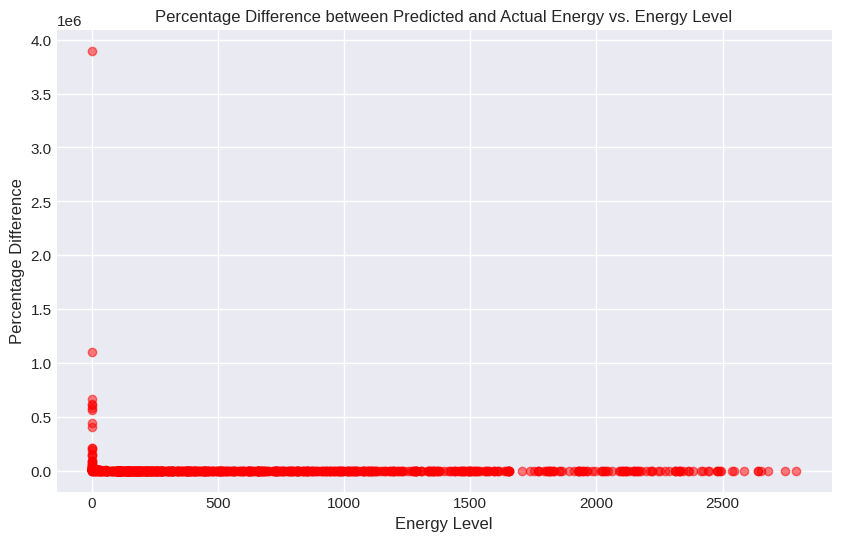

In [ ]:
absolute_differences = abs(y_pred_svm - y_test)

percentage_difference = (absolute_differences / y_test) * 100

data_percentage = pd.DataFrame({'Energy': y_test, 'Percentage Difference': percentage_difference})

print(data_percentage.head())

data_percentage_sorted = data_percentage.sort_values(by='Energy')

plt.figure(figsize=(10, 6))

plt.scatter(data_percentage_sorted['Energy'], data_percentage_sorted['Percentage Difference'], color='red', alpha=0.5)

plt.title('Percentage Difference between Predicted and Actual Energy vs. Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Percentage Difference')

plt.grid(True)
plt.show()


### Error relativo (escala logarítmicas)
Se ha aplicado una escala logarítimica para visualizar mejor los datos.

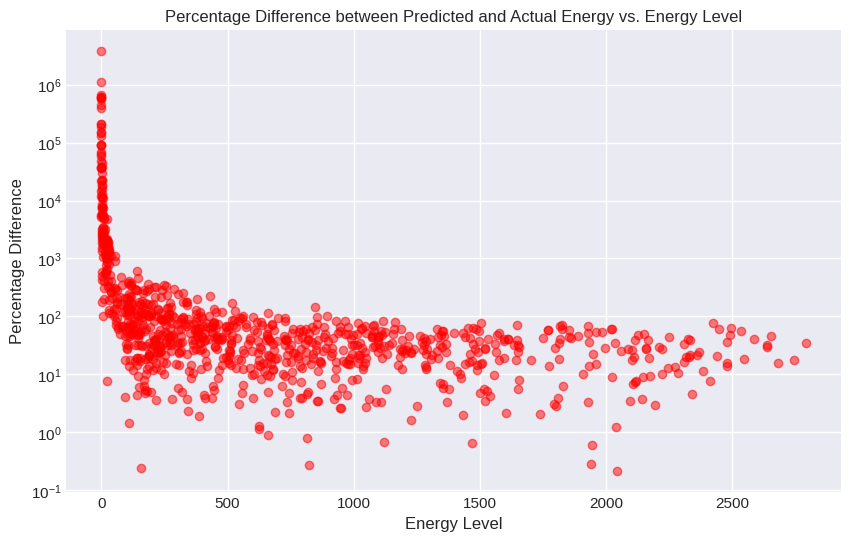

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot percentage difference against energy with logarithmic scale on y-axis
plt.scatter(data_percentage_sorted['Energy'], data_percentage_sorted['Percentage Difference'], color='red', alpha=0.5)

# Apply logarithmic scale to y-axis
plt.yscale('log')

# Add labels and title
plt.title('Percentage Difference between Predicted and Actual Energy vs. Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Percentage Difference')

# Show plot
plt.grid(True)
plt.show()


### Métricas de error generales
Se muestran las métricas de error del dataset en su conjunto

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate absolute differences between predicted and actual values
absolute_differences = abs(y_pred_svm - y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred_svm)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_svm)

# Calculate RAE (Relative Absolute Error)
rae = mean_absolute_error(y_test, y_pred_svm) / np.mean(y_test)

# Calculate RSE (Relative Squared Error)
rse = np.mean((y_pred_svm - y_test) ** 2) / np.mean((y_test - np.mean(y_test)) ** 2)

# Create a DataFrame to store the error metrics
error_metrics = pd.DataFrame({
    'RMSE': [rmse],
    'MSE': [mse],
    'RAE': [rae],
    'RSE': [rse],
    'MAE': [mae]
})

print("Error Metrics:")
print(error_metrics)


Error Metrics:
         RMSE            MSE       RAE       RSE         MAE
0  386.850902  149653.620614  0.401672  0.336627  278.834363


Ahora filtramos los outliers. Especialmente queremos filtrar los datos predichos cuando la energía real es 0, ya que al mostrar el porcentaje de energía mal predicha y ser la energía real 0, el error teórico es infinito.

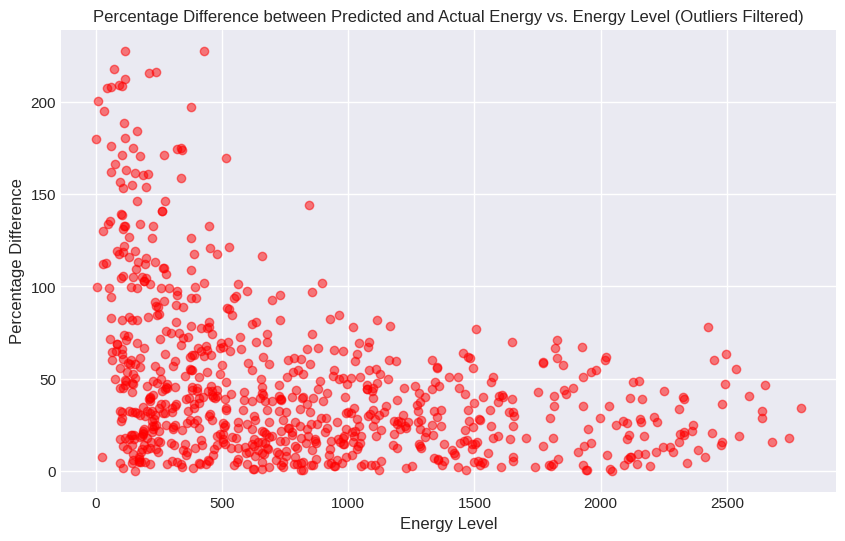

In [ ]:
Q1 = data_percentage_sorted['Percentage Difference'].quantile(0.25)
Q3 = data_percentage_sorted['Percentage Difference'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5 * IQR

# Filtrar outliers
filtered_data = data_percentage_sorted[
    (data_percentage_sorted['Percentage Difference'] >= Q1 - threshold) &
    (data_percentage_sorted['Percentage Difference'] <= Q3 + threshold)
]

plt.figure(figsize=(10, 6))

plt.scatter(filtered_data['Energy'], filtered_data['Percentage Difference'], color='red', alpha=0.5)

plt.title('Percentage Difference between Predicted and Actual Energy vs. Energy Level (Outliers Filtered)')
plt.xlabel('Energy Level')
plt.ylabel('Percentage Difference')

plt.grid(True)
plt.show()


Cálculo de error para las energías bajas y altas

In [ ]:
# Calculate the third quantile (75th percentile) of the energy values
energy_threshold = filtered_data['Energy'].quantile(0.75)

# Calculate the error for high and low values of energy
low_energy_error = filtered_data.loc[filtered_data['Energy'] < energy_threshold, 'Percentage Difference'].mean()
high_energy_error = filtered_data.loc[filtered_data['Energy'] >= energy_threshold, 'Percentage Difference'].mean()

# Round the error values to three decimals
low_energy_error_rounded = round(low_energy_error, 3)
high_energy_error_rounded = round(high_energy_error, 3)

# Print the error for low and high energy values with three decimals
print("Average Percentage Difference for Low Energy Values:", low_energy_error_rounded, "%")
print("Average Percentage Difference for High Energy Values:", high_energy_error_rounded,"%")


Average Percentage Difference for Low Energy Values: 54.218 %
Average Percentage Difference for High Energy Values: 27.671 %


Como podemos observar, tanto en el gráfico como en el error medio, existe un error algo mayor para los valores con energías bajas. Aunque en valores absolutos la diferencia no se aprecia, gracias al error porcentual podemos observar claramente este suceso.

# Entrenamiento del modelo final

Entrenamos el modelo con todo el conjunto de datos

In [ ]:
svm_grid_search.fit(X, y)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVR())]),
             n_jobs=-1,
             param_grid={'svm__C': [500, 600, 700, 800, 900, 1000],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_root_mean_squared_error', verbose=1)

Guardamos el modelo en "modelo_final.pkl"

In [ ]:
import joblib

joblib.dump(svm_grid_search, '/content/drive/MyDrive/modelo_final.pkl')

['/content/drive/MyDrive/modelo_final.pkl']

# Uso de ChatGPT

Hemos usado ChatGPT para obtener ayuda para la generación de los gráficos del EDA. Además, nos ha ayudado con algunas funciones de pandas y numpy ya que al ser la primera vez que usábamos estas librerías, no teníamos muy claro como trabajar con los dataframes. Además, nos ha ayudado con algunas duda teóricas que nos han surgido a lo largo del desarrollo de la práctica como qué hiperperámetros probar y cuales no para cada método.

Finalmente, en algunas ocasiones nos ha ayudado para que, una vez teníamos un modelo bien planteado y con un esqueleto que pudieramos duplicar, fueramos capaces de crear los otros tipos de modelos con mayor velocidad.

Sin embargo, nos gustaría destacar, que en bastantes ocasiones cometía errores, que o bien conseguíamos solucionar introduciéndole el error o teníamos que solucionar nosotros mismos. Además, si los prompts no eran detallados y no le suministrábamos suficiente contexto, cometía aún más errores.